## Checking the Driver

In [ ]:
!nvidia-smi

Wed Jul 31 17:26:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Mounting Drive

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Changing Directory to Store all results


In [ ]:
%cd /content/drive/MyDrive/Kathak_Trainer

/content/drive/MyDrive/Kathak_Trainer


### Checking the Main Directory

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Kathak_Trainer


## Installing Dependencies

In [ ]:
!pip install roboflow
!pip install requests
!apt-get install ffmpeg
!pip install Pillow
!pip install ultralytics==8.0.196

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvid

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


### Download Yolov8 from Ultralytics

In [ ]:
!pip install roboflow
from roboflow import Roboflow
import requests
import subprocess
from google.colab import files
from ultralytics import YOLO
from IPython.display import display, Image
from PIL import Image

### Add Roboflow

In [ ]:
rf = Roboflow(api_key="6e1btkHFoBqSU5NzPKG3")
project = rf.workspace("aniruddha-jmp5a").project("kathak-trainer")
version = project.version(8)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kathak-Trainer-8 in yolov8:: 100%|██████████| 3150/3150 [00:00<00:00, 8776.78it/s]


# Training of the Custom Dataset

https://docs.ultralytics.com/modes/train/#train-settings

yolov8 Documentation link

In [ ]:
!yolo detect train model=/content/drive/MyDrive/Kathak_Trainer/runs/detect/train7/weights/last.pt data=/content/drive/MyDrive/Kathak_Trainer/Kathak-Trainer-8/data.yaml epochs=300 imgsz=640 patience=150 save=true

New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Kathak_Trainer/runs/detect/train7/weights/last.pt, data=/content/drive/MyDrive/Kathak_Trainer/Kathak-Trainer-8/data.yaml, epochs=300, patience=150, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [ ]:
!yolo train resume model={HOME}/runs/detect/train/weights/last.pt epochs=150

New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer/runs/detect/train/weights/last.pt, data=/content/drive/MyDrive/Kathak_Trainer/Kathak-Trainer-5/data.yaml, epochs=250, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_

In [ ]:
!ls {HOME}/runs/detect/train8/

args.yaml					    PR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			    R_curve.png		 val_batch0_pred.jpg
confusion_matrix.png				    results.csv		 val_batch1_labels.jpg
events.out.tfevents.1722426308.a9ec989ecf79.3539.0  results.png		 val_batch1_pred.jpg
F1_curve.png					    roboflow_deploy.zip  val_batch2_labels.jpg
labels_correlogram.jpg				    state_dict.pt	 val_batch2_pred.jpg
labels.jpg					    train_batch0.jpg	 weights
model_artifacts.json				    train_batch1.jpg
P_curve.png					    train_batch2.jpg


/content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer


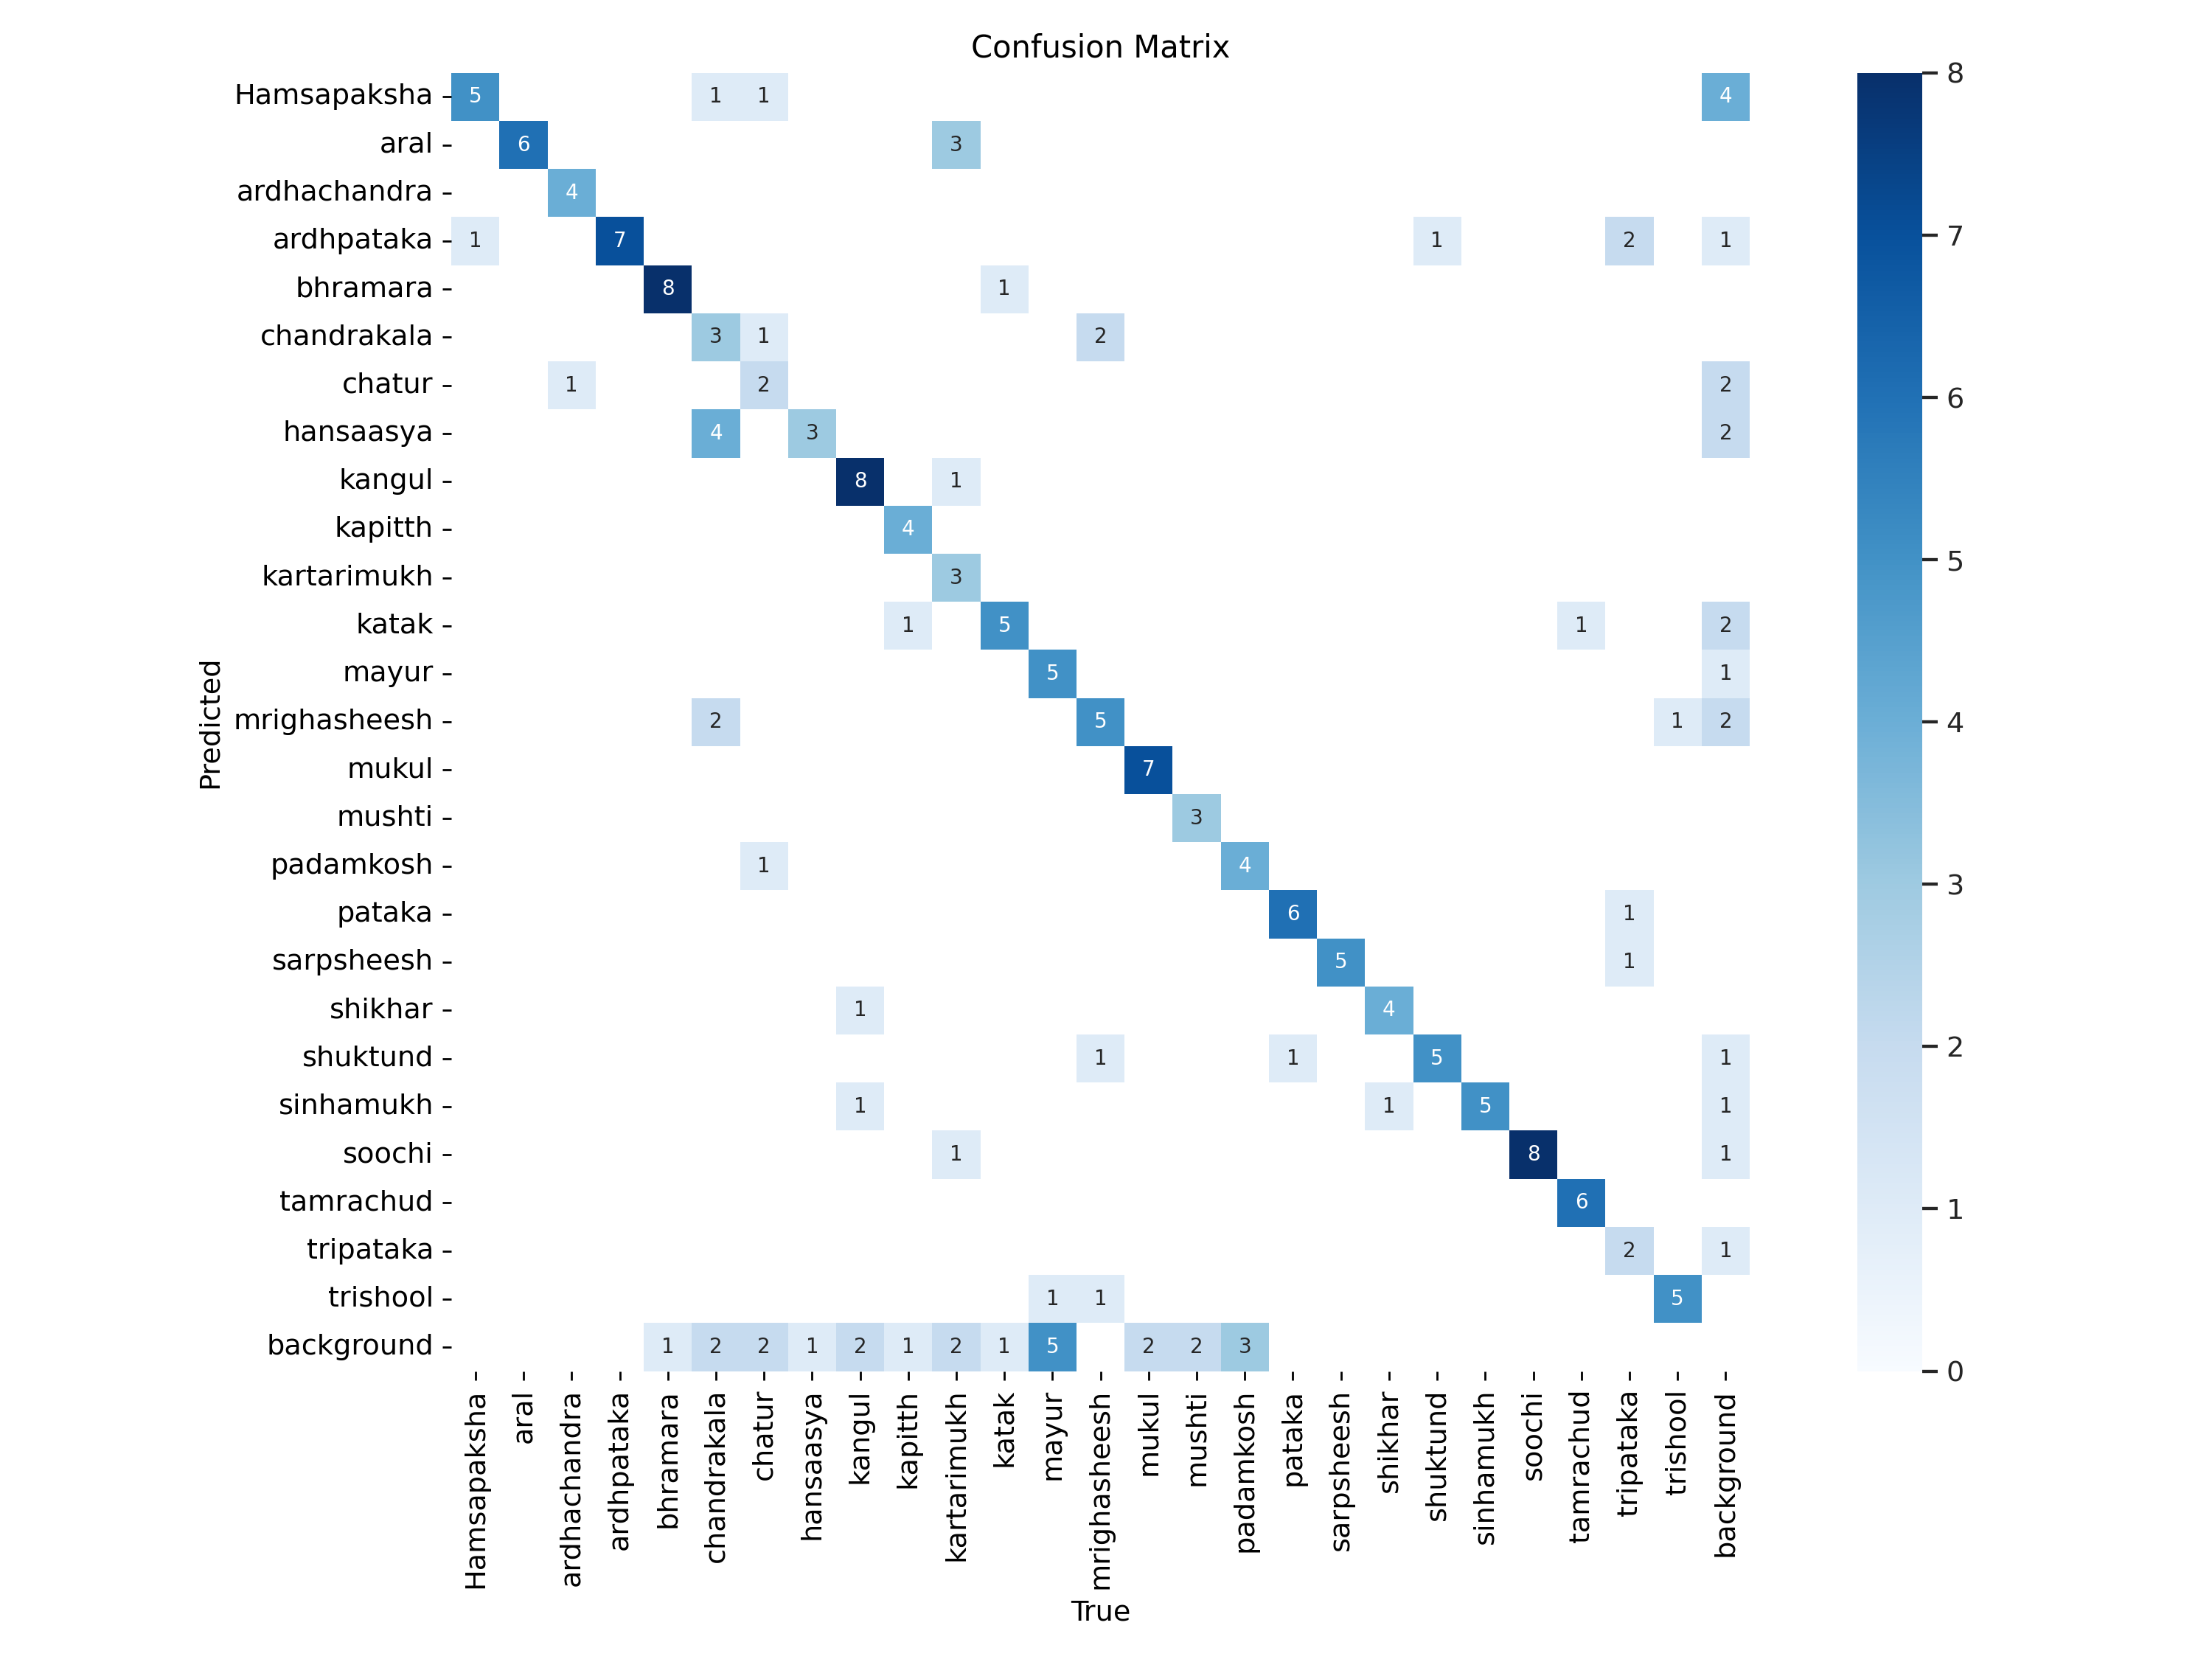

In [ ]:
%cd {HOME}
Image.open(f'{HOME}/runs/detect/train8/confusion_matrix.png')

/content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer


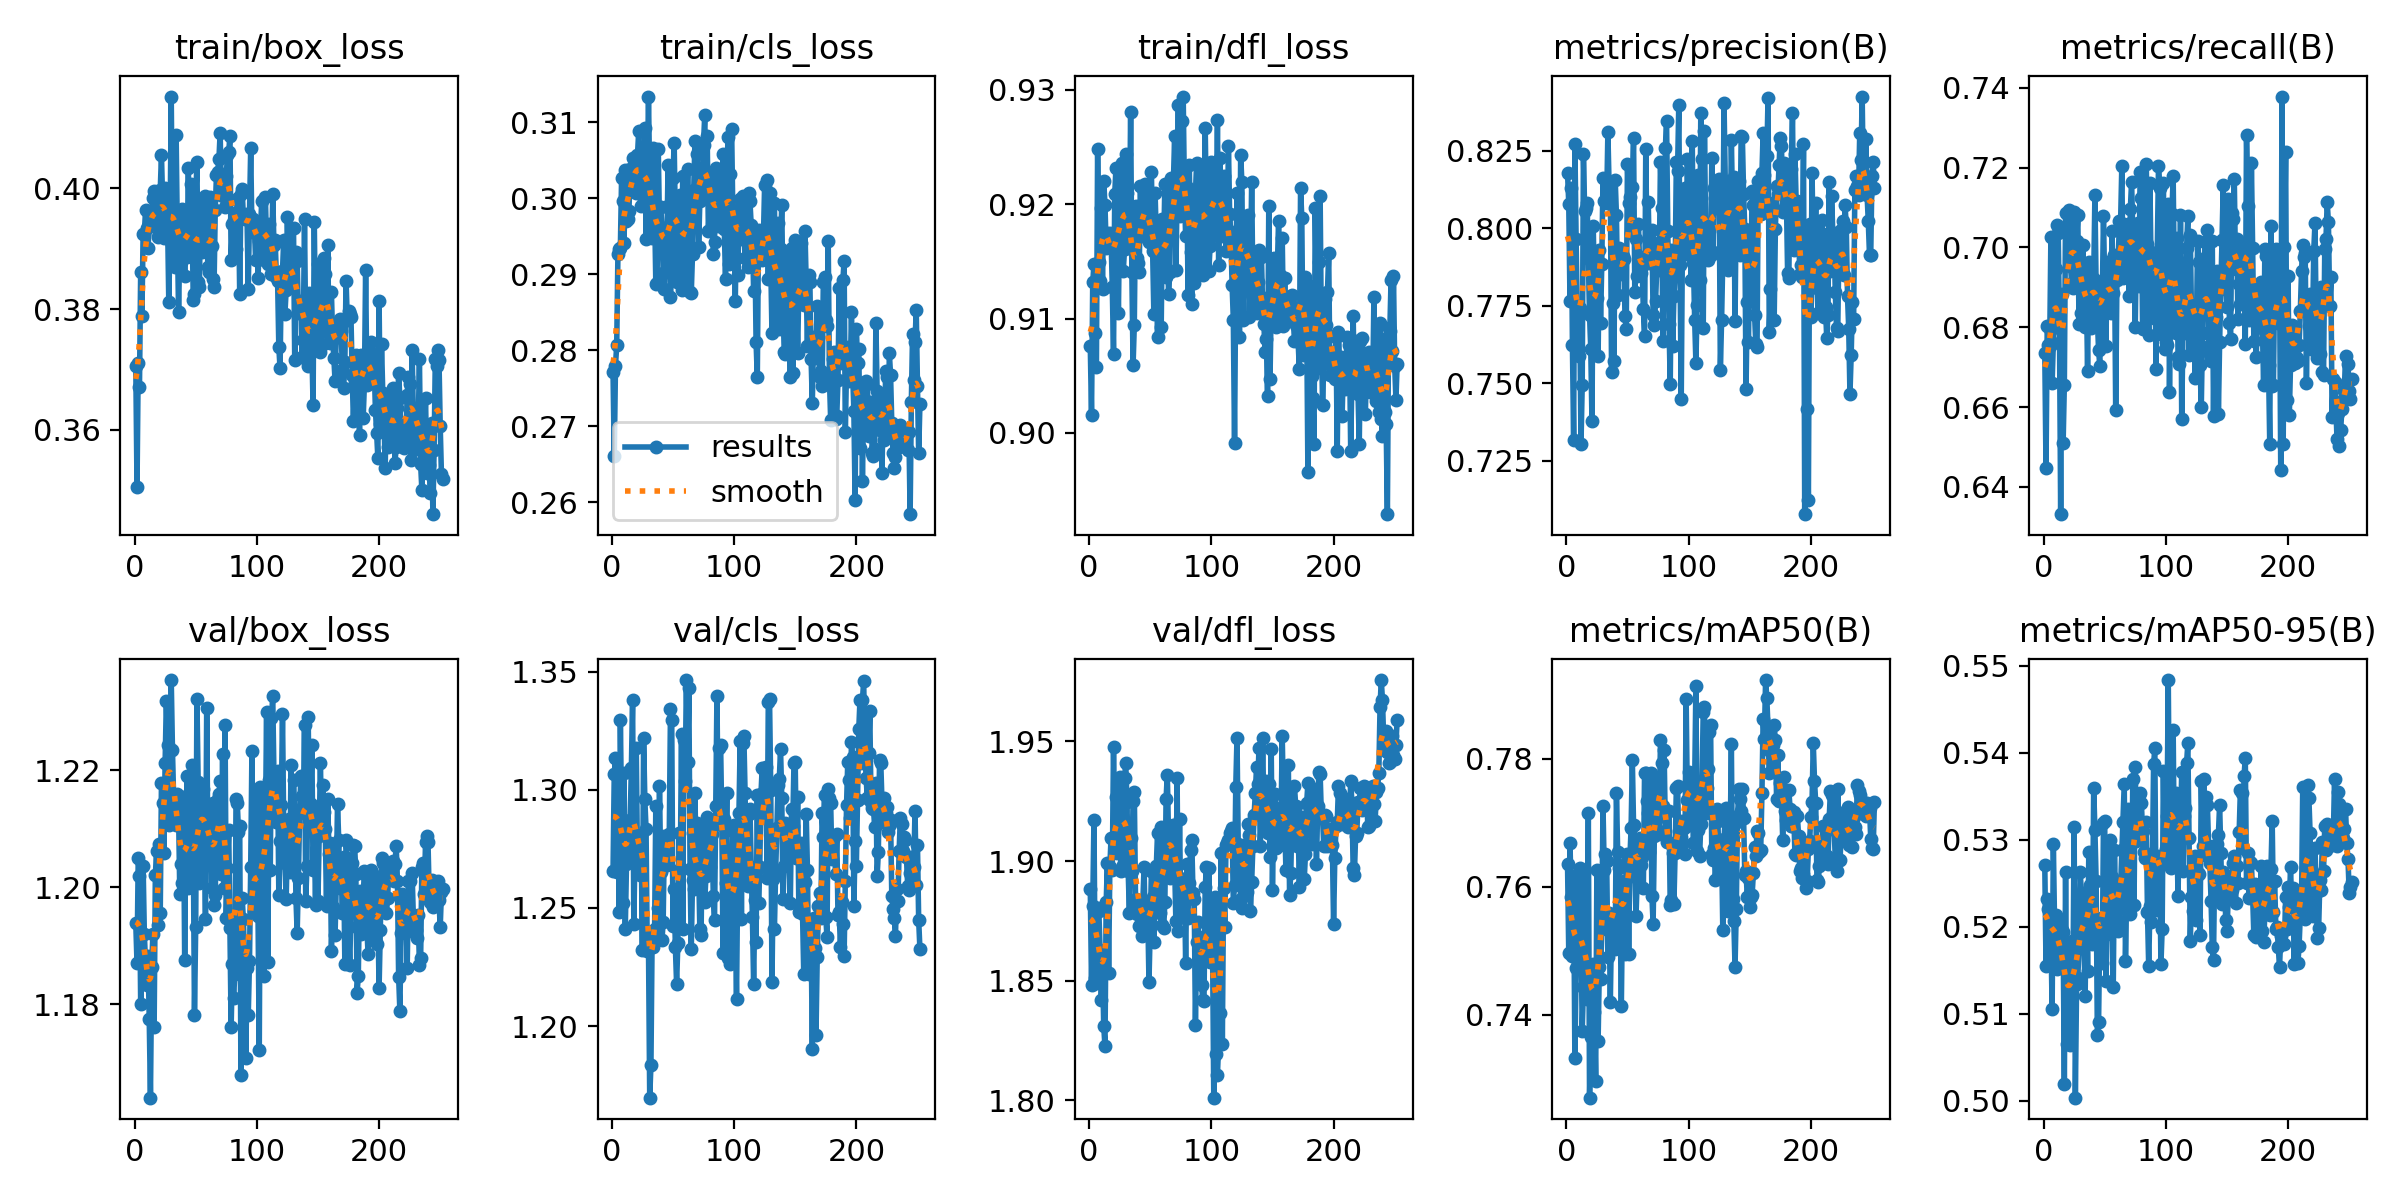

In [ ]:
%cd {HOME}
Image.open(f'{HOME}/runs/detect/train8/results.png')

/content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer


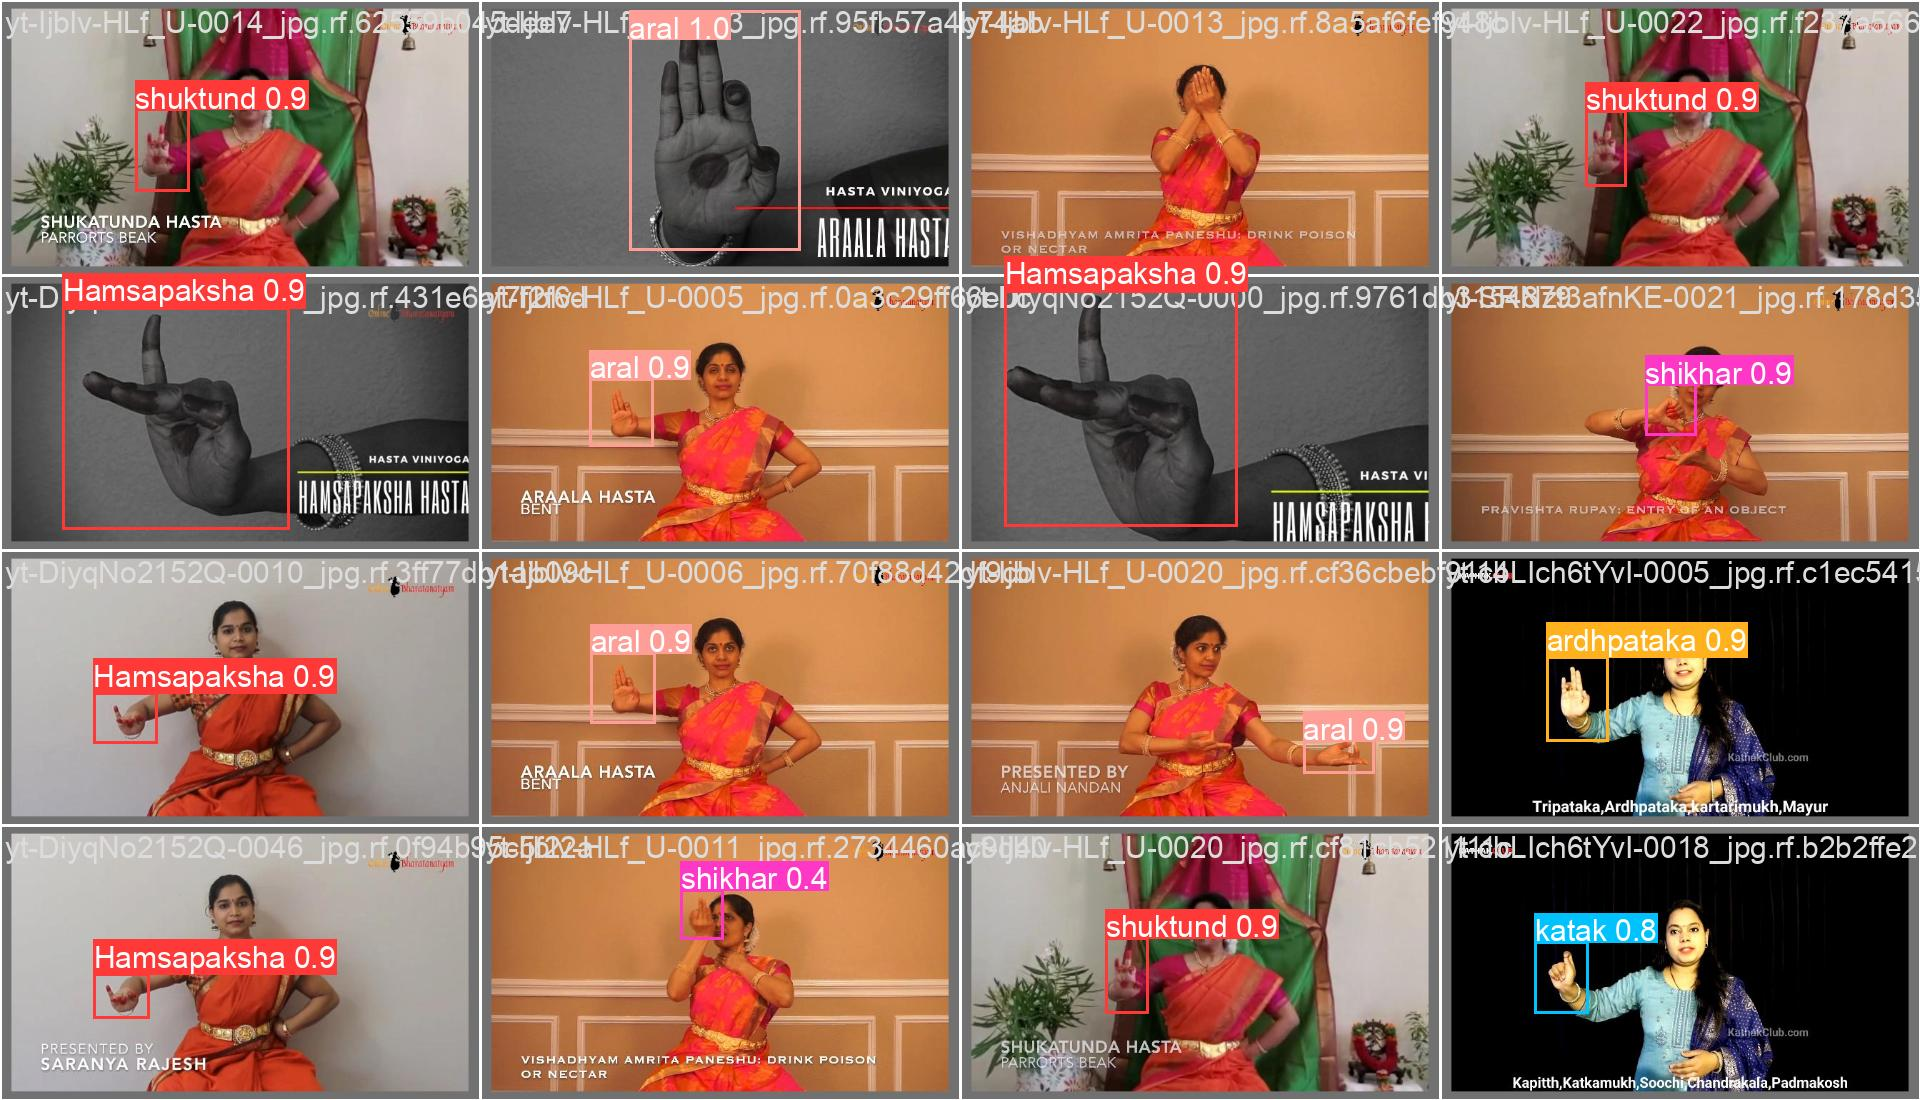

In [ ]:
%cd {HOME}
Image.open(f'{HOME}/runs/detect/train8/val_batch0_pred.jpg')

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/15ngDZzvCwFjuLYSl05y1LR2kLohRsnaO/Kathak_Trainer/Kathak-Trainer-8/valid/labels.cache... 179 images, 3 backgrounds, 0 corrupt: 100% 179/179 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 187. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:05<00:00,  2.05it/s]
                   all        179        187      0.783      0.706      0.775      0.545
           Hamsapaksha        179          6      

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (2655/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 8.3ms
video 1/1 (2656/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.7ms
video 1/1 (2657/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 14.5ms
video 1/1 (2658/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.5ms
video 1/1 (2659/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.4ms
video 1/1 (2660/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.8ms
video 1/1 (2661/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.5ms
video 1/1 (2662/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4: 384x640 (no detections), 6.4ms
video 1/1 (2663/7651) /content/drive/MyDrive/Kathak_Trainer/Hand_Gesture.mp4

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train8/")

View the status of your deployment at: https://app.roboflow.com/aniruddha-jmp5a/kathak-trainer/8
Share your model with the world at: https://universe.roboflow.com/aniruddha-jmp5a/kathak-trainer/model/8


In [ ]:
!pip install inference
!pip install supervision
!pip install opencv-python

In [ ]:
from inference import InferencePipeline
from inference.core.interfaces.camera.entities import VideoFrame

# import opencv to display our annotated images
import cv2
# import supervision to help visualize our predictions
import supervision as sv

In [ ]:
# create a bounding box annotator and label annotator to use in our custom sink
label_annotator = sv.LabelAnnotator()
box_annotator = sv.BoxAnnotator()

In [ ]:
def my_custom_sink(predictions: dict, video_frame: VideoFrame):
    # get the text labels for each prediction
    labels = [p["class"] for p in predictions["predictions"]]
    # load our predictions into the Supervision Detections api
    detections = sv.Detections.from_inference(predictions)
    # annotate the frame using our supervision annotator, the video_frame, the predictions (as supervision Detections), and the prediction labels
    image = label_annotator.annotate(
        scene=video_frame.image.copy(), detections=detections, labels=labels
    )
    image = box_annotator.annotate(image, detections=detections)
    # display the annotated image
    cv2.imshow("Predictions", image)
    cv2.waitKey(1)

In [ ]:

pipeline = InferencePipeline.init(
    model_id="/content/drive/MyDrive/Kathak_Trainer/runs/detect/train8/weights/best.pt",
    video_reference="/content/Y2meta.app-ASAMYUKTA HASTA _ single hand gestures (with meaning) _ kaladarpan _ bharatnatyam _ classical dance-(1080p).mp4",
    on_prediction=my_custom_sink,
)

pipeline.start()
pipeline.join()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


InvalidModelIDError: Model ID: `/content/drive/MyDrive/Kathak_Trainer/runs/detect/train8/weights/best.pt` is invalid.

## Problems That I tackles

the map50-95 was lower then map50
- tackled by changing the IOU to more stricter images for those classes